#  Selective Search

* https://github.com/AlpacaTechJP/selectivesearch

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Install selectivesearch Package

In [ ]:
!pip install -q selectivesearch

  Preparing metadata (setup.py) ... done


# II. Imgae File Download

* NA.gif 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/NA.gif

--2023-04-07 01:30:45--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/NA.gif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168404 (164K) [image/gif]
Saving to: ‘NA.gif’

NA.gif              100%[===================>] 164.46K  --.-KB/s    in 0.003s  

2023-04-07 01:30:45 (60.7 MB/s) - ‘NA.gif’ saved [168404/168404]



* NA.gif 확인

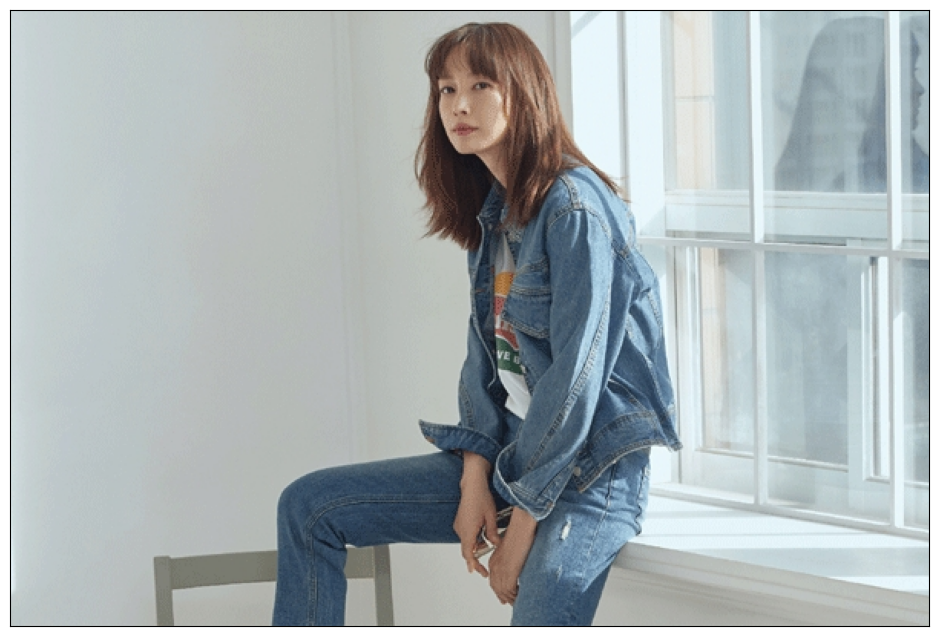

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('NA.gif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# III. selectivesearch Package

> ## 1) selectivesearch.selective_search( )

* scale:  알고리즘 탐색 Object 크기
* <font color = 'blue'>min_size</font>: 최소 추천 탐지 크기(면적)

In [ ]:
import selectivesearch 

_, regions = selectivesearch.selective_search(img_rgb, 
                                              scale = 1000, 
                                              min_size = 10000)

>## 2) <font color = 'red'>regions</font>

* 탐지된 Rigion 정보
 - rect: x, y, width, height
 - size: Sum of Bounding Boxes
 - labels: Object ID

In [ ]:
print(type(regions))
print()

for i in regions:
  print(i)

<class 'list'>

{'rect': (0, 0, 348, 401), 'size': 115945, 'labels': [0.0]}
{'rect': (258, 0, 178, 401), 'size': 49188, 'labels': [1.0]}
{'rect': (403, 0, 196, 351), 'size': 65344, 'labels': [2.0]}
{'rect': (379, 346, 220, 55), 'size': 10723, 'labels': [3.0]}
{'rect': (258, 0, 341, 401), 'size': 59911, 'labels': [1.0, 3.0]}
{'rect': (258, 0, 341, 401), 'size': 125255, 'labels': [1.0, 3.0, 2.0]}


>## 3) 'rect' Information

In [ ]:
cand_rects = [cand['rect'] for cand in regions]

print(cand_rects)

[(0, 0, 348, 401), (258, 0, 178, 401), (403, 0, 196, 351), (379, 346, 220, 55), (258, 0, 341, 401), (258, 0, 341, 401)]


# IV. Bounding Box Visualization

>## 1) cv2.rectangle( )

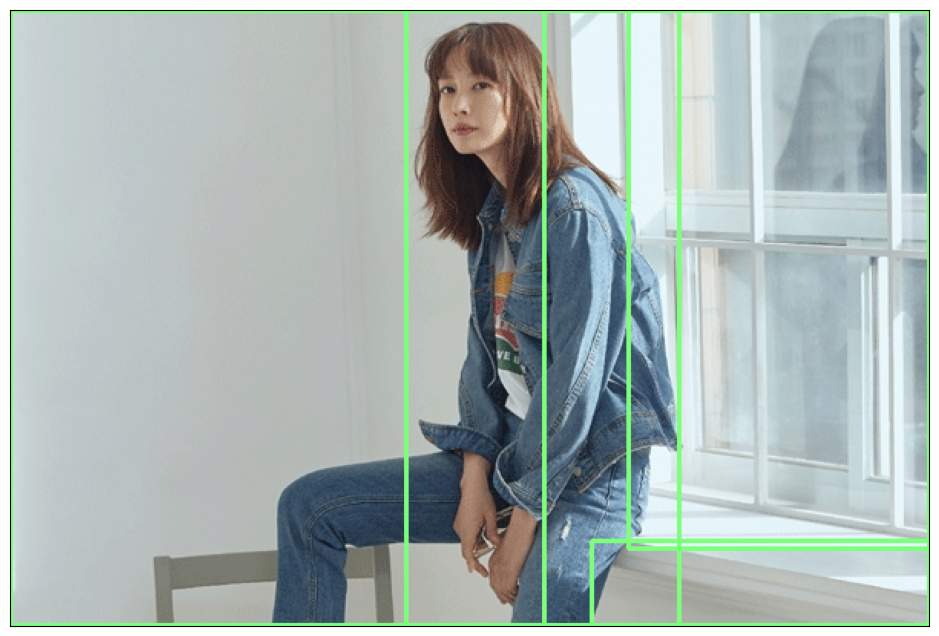

In [ ]:
import cv2
import matplotlib.pyplot as plt

green_rgb = (125, 255, 125)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
    
    left = rect[0]          # x
    top = rect[1]           # y
    right = left + rect[2]  # width
    bottom = top + rect[3]  # height
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, 
                                 (left, top), (right, bottom), 
                                 color = green_rgb, 
                                 thickness = 2)
    
plt.figure(figsize = (12, 8))
plt.imshow(img_rgb_copy)
plt.xticks([])
plt.yticks([])
plt.show()

>## 2) 'size' Filtering 

* 'size' > 50000

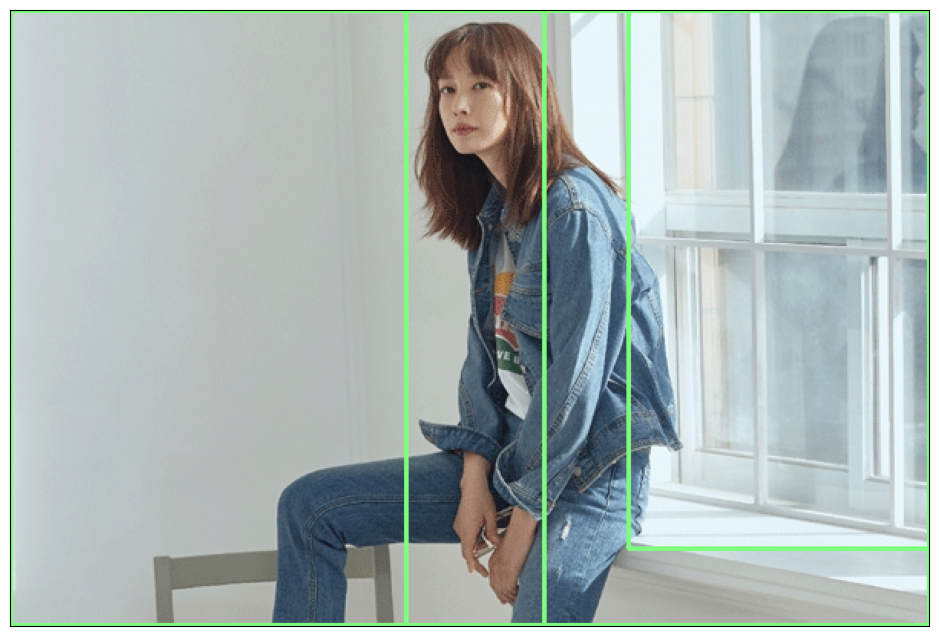

In [ ]:
import cv2
import matplotlib.pyplot as plt

cand_rects = [cand['rect'] for cand in regions if cand['size'] > 50000]

green_rgb = (125, 255, 125)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
    
    left = rect[0]          # x
    top = rect[1]           # y
    right = left + rect[2]  # width
    bottom = top + rect[3]  # height

    img_rgb_copy = cv2.rectangle(img_rgb_copy, 
                                 (left, top), 
                                 (right, bottom), 
                                 color = green_rgb, 
                                 thickness = 2)
    
plt.figure(figsize = (12, 8))
plt.imshow(img_rgb_copy)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 